In [22]:
#Example EOF analysis

In [23]:
#global datasets 
#https://scitools-iris.readthedocs.io/en/latest/installing.html
#conda install -c conda-forge iris
#conda install -c conda-forge iris-sample-data

#https://ajdawson.github.io/eofs/latest/
#eof tool
#conda install -c conda-forge eofs

#additional tools
#conda install -c conda-forge netcdf4
#conda install -c conda-forge matplotlib
#conda install -c conda-forge cartopy

#conda install -c anaconda xarray

*Example using eofs tools

In [25]:
"""
Compute and plot the leading EOF of sea surface temperature in the
central and northern Pacific during winter time.

The spatial pattern of this EOF is the canonical El Nino pattern, and
the associated time series shows large peaks and troughs for well-known
El Nino and La Nina events.

This example uses the plain numpy interface.

Additional requirements for this example:

    * netCDF4 (http://unidata.github.io/netcdf4-python/)
    * matplotlib (http://matplotlib.org/)
    * cartopy (http://scitools.org.uk/cartopy/)

"""

'\nCompute and plot the leading EOF of sea surface temperature in the\ncentral and northern Pacific during winter time.\n\nThe spatial pattern of this EOF is the canonical El Nino pattern, and\nthe associated time series shows large peaks and troughs for well-known\nEl Nino and La Nina events.\n\nThis example uses the plain numpy interface.\n\nAdditional requirements for this example:\n\n    * netCDF4 (http://unidata.github.io/netcdf4-python/)\n    * matplotlib (http://matplotlib.org/)\n    * cartopy (http://scitools.org.uk/cartopy/)\n\n'

In [26]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path

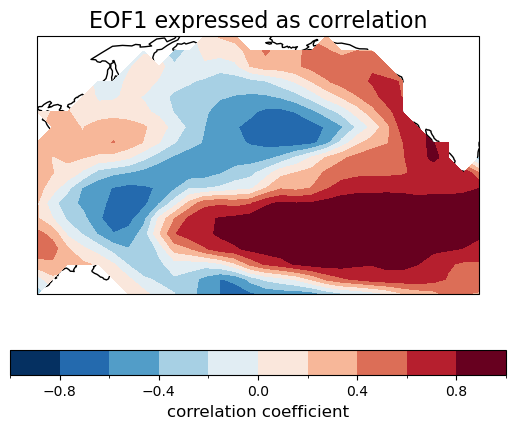

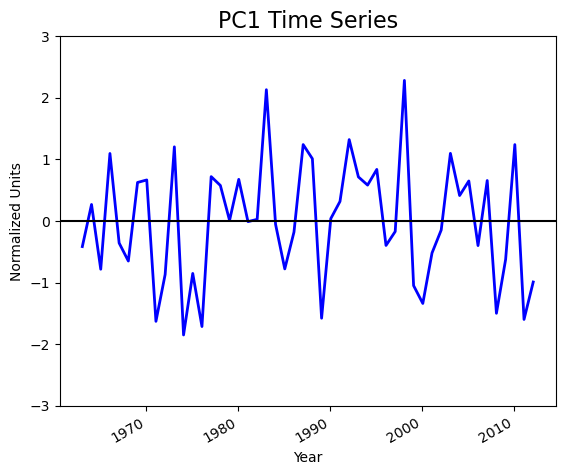

In [27]:
# Read SST anomalies using the xarray module. The file contains November-March
# averages of SST anomaly in the central and northern Pacific.
filename = example_data_path('sst_ndjfm_anom.nc')
sst = xr.open_dataset(filename)['sst']

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(sst.coords['latitude'].values))
wgts   = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)

# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)

# Plot the leading PC time series.
plt.figure()
pc1[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()

Implementation if tool with Modelled data 2017, Satellite data 2017, and Satellite data 2015-2020

In [34]:
#Xarray analysis

In [35]:
dfm_file           = r"C:\Users\mafmo\CISNE\hybrid-spm\SPM\DWSM-FM_100m_0000_map_regular_500_400_SPM.nc"
cms_file           = r"C:\Users\mafmo\CISNE\hybrid-spm\SPM\2015_2020_P1D_HROC_L3-transp_NWS_31_32ULE_100m-v01.nc"
    
#xarray object
dfm = xr.open_dataset(dfm_file).sel(layer=-0.05)['mesh2d_water_quality_output_9']
cms = xr.open_dataset(cms_file)['SPM']

In [36]:
#cut dfm to boundaries of cmems
dfm_cut   = dfm.where(((dfm.lat <= cms.lat.max()) & (dfm.lat >= cms.lat.min()) \
                         & (dfm.lon <= cms.lon.max()) & (dfm.lon >= cms.lon.min())),drop=True)
#cut cmems to temporal boundaries of dfm
cms_cut   = cms.sel(time=cms.time.dt.year == 2018)

In [38]:
dfm

<xarray.DataArray 'mesh2d_water_quality_output_9' (time: 366, lat: 400, lon: 500)>
[73200000 values with dtype=float64]
Coordinates:
  * lon      (lon) float32 4.003 4.01 4.017 4.025 ... 7.549 7.556 7.563 7.57
  * lat      (lat) float32 52.55 52.55 52.56 52.56 ... 53.96 53.97 53.97 53.97
    layer    float32 -0.05
  * time     (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2018-01-01
Attributes:
    mesh:          mesh2d
    location:      face
    coordinates:   mesh2d_face_x mesh2d_face_y
    cell_methods:  mesh2d_nFaces: mean
    long_name:     TIM
    units:         (gDM/m3)
    grid_mapping:  wgs84
    description:   TIM - total inorganic matter (gDM/m3) in flow element

In [37]:
cms

<xarray.DataArray 'SPM' (time: 844, lat: 1353, lon: 1960)>
[2238186720 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 5.941 5.943 5.943 5.944 ... 7.649 7.649 7.651 7.651
  * lat      (lat) float64 53.12 53.12 53.13 53.13 ... 54.14 54.14 54.14 54.14
  * time     (time) datetime64[ns] 2015-07-06 2015-07-16 ... 2020-12-31
Attributes:
    long_name:      Suspended Particulate Matter derived from MSI L2R using H...
    standard_name:  mass_concentration_of_suspended_matter_in_sea_water
    units:          g m-3
    valid_min:      0.0

In [32]:
cms_cut

<xarray.DataArray 'SPM' (time: 144, lat: 1353, lon: 1960)>
[381870720 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 5.941 5.943 5.943 5.944 ... 7.649 7.649 7.651 7.651
  * lat      (lat) float64 53.12 53.12 53.13 53.13 ... 54.14 54.14 54.14 54.14
  * time     (time) datetime64[ns] 2018-01-01 2018-01-03 ... 2018-12-29
Attributes:
    long_name:      Suspended Particulate Matter derived from MSI L2R using H...
    standard_name:  mass_concentration_of_suspended_matter_in_sea_water
    units:          g m-3
    valid_min:      0.0

In [39]:
def eof_function(ncobject, latitude):
    coslat = np.cos(np.deg2rad(ncobject.coords[latitude].values))
    wgts   = np.sqrt(coslat)[..., np.newaxis]
    solver = Eof(ncobject, weights=wgts)
    
    eof1 = solver.eofsAsCorrelation(neofs=1)
    pc1  = solver.pcs(npcs=1, pcscaling=1)
    
    # Plot the leading PC time series.
    plt.figure()
    pc1[:, 0].plot(color='b', linewidth=2)
    ax = plt.gca()
    ax.axhline(0, color='k')
    ax.set_ylim(-6, 3)
    ax.set_xlabel('Year')
    ax.set_ylabel('Normalized Units')
    ax.set_title('PC1 Time Series', fontsize=16)

    plt.show()
    
    
    # Plot the leading EOF expressed as correlation in the Pacific domain.
    clevs = np.linspace(-1, 1, 11)
    ax    = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
    fill  = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                                 add_colorbar=False, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
    cb = plt.colorbar(fill, orientation='horizontal')
    cb.set_label('correlation coefficient', fontsize=12)
    ax.set_title('EOF1 expressed as correlation', fontsize=16)
    return

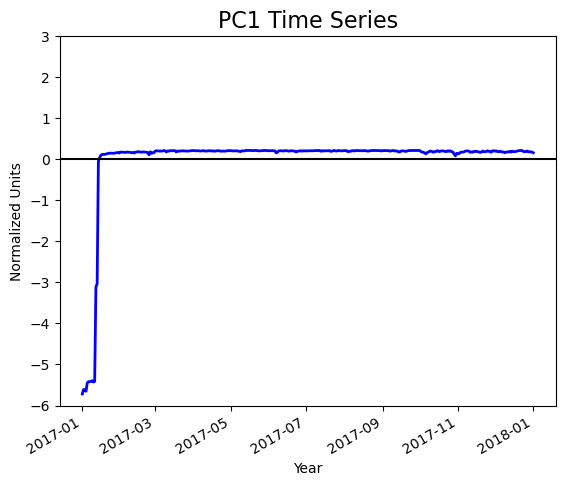

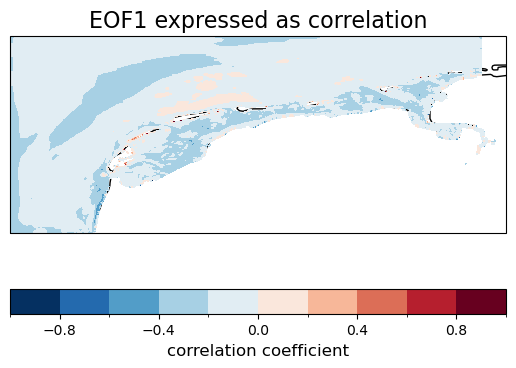

In [40]:
test_layer = eof_function(dfm, 'lat')

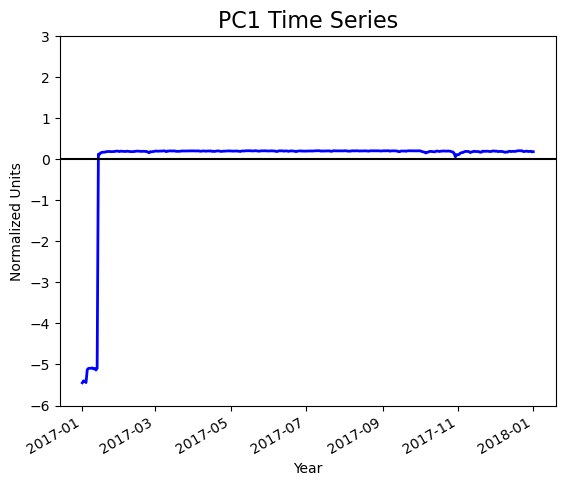

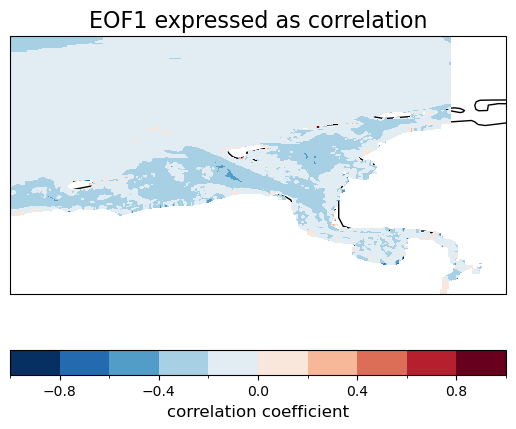

In [41]:
test_layer =eof_function(dfm_cut, 'lat')

In [21]:
test_layer =eof_function(cms, 'lat')

MemoryError: Unable to allocate 8.34 GiB for an array with shape (844, 1353, 1960) and data type float32

In [20]:
test_layer =eof_function(cms_cut, 'lat')

ValueError: all input data is missing